In [2]:
#!pip install yahoofinancials
#!pip install yfinance

In [4]:
# https://towardsdatascience.com/a-comprehensive-guide-to-downloading-stock-prices-in-python-2cd93ff821d4
# https://pypi.org/project/yfinance/
import sys

!{sys.executable} --version
# !{sys.executable} -m pip install yfinance
# !{sys.executable} -m pip install yahoofinancials

import pandas as pd
import yfinance as yf
from yahoofinancials import YahooFinancials
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline

Python 3.11.4


# download Tesla price history

In [12]:
tsla_df = yf.download('TSLA', 
                      start='2019-01-01', 
                      end='2024-02-15', 
                      progress=False, auto_adjust=True)
display(tsla_df.head())
display(tsla_df.tail())

,Open,High,Low,Close,Volume
Date,,,,,
2019-01-02,20.406668,21.008667,19.920000,20.674667,174879000
2019-01-03,20.466667,20.626667,19.825333,20.024000,104478000
2019-01-04,20.400000,21.200001,20.181999,21.179333,110911500
2019-01-07,21.448000,22.449333,21.183332,22.330667,113268000
2019-01-08,22.797333,22.934000,21.801332,22.356667,105127500


,Open,High,Low,Close,Volume
Date,,,,,
2024-02-08,189.000000,191.619995,185.580002,189.559998,83034000
2024-02-09,190.179993,194.119995,189.479996,193.570007,84476300
2024-02-12,192.110001,194.729996,187.279999,188.130005,95498600
2024-02-13,183.990005,187.259995,182.110001,184.020004,86759500
2024-02-14,185.300003,188.889999,183.350006,188.710007,81203000


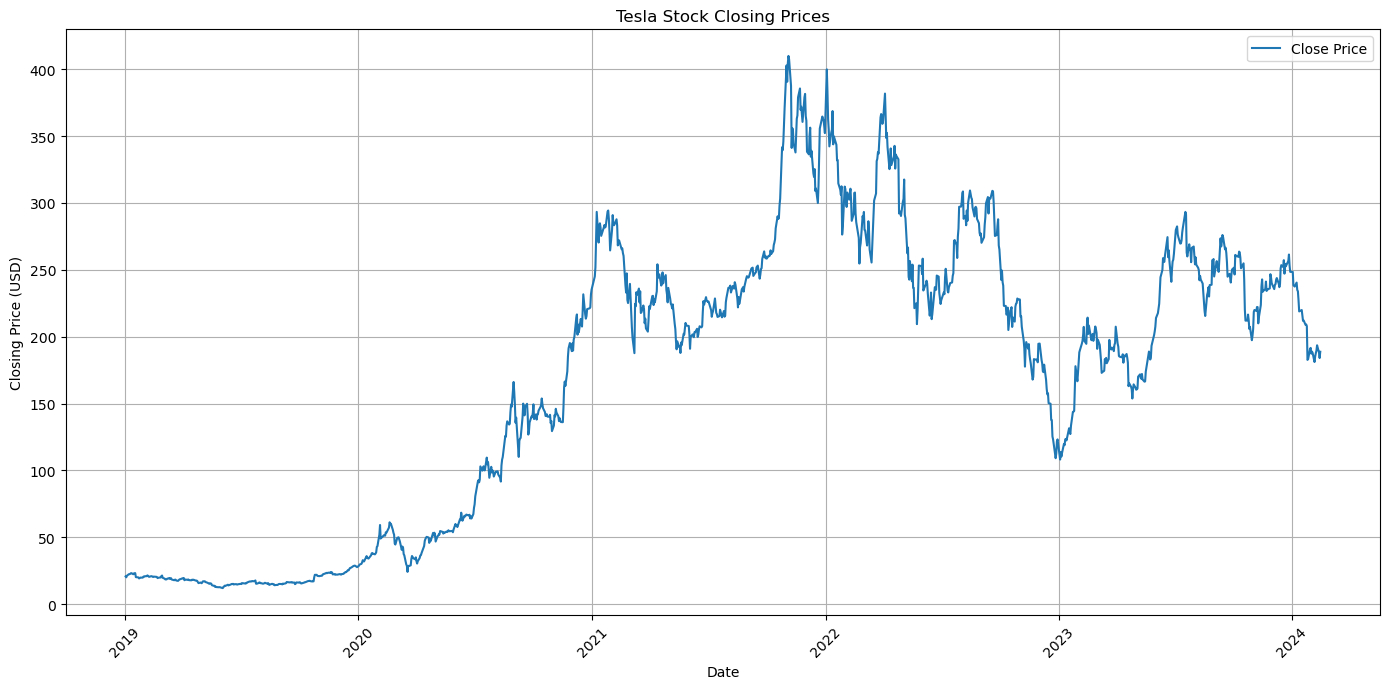

In [13]:
plt.figure(figsize=(14, 7))  # Set the figure size for better readability
plt.plot(tsla_df.index, tsla_df['Close'], label='Close Price')  # Plot the close price against the dates
plt.title('Tesla Stock Closing Prices')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('Closing Price (USD)')  # Y-axis label
plt.legend()  # Show legend to identify the line
plt.grid(True)  # Show grid for better readability of the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()

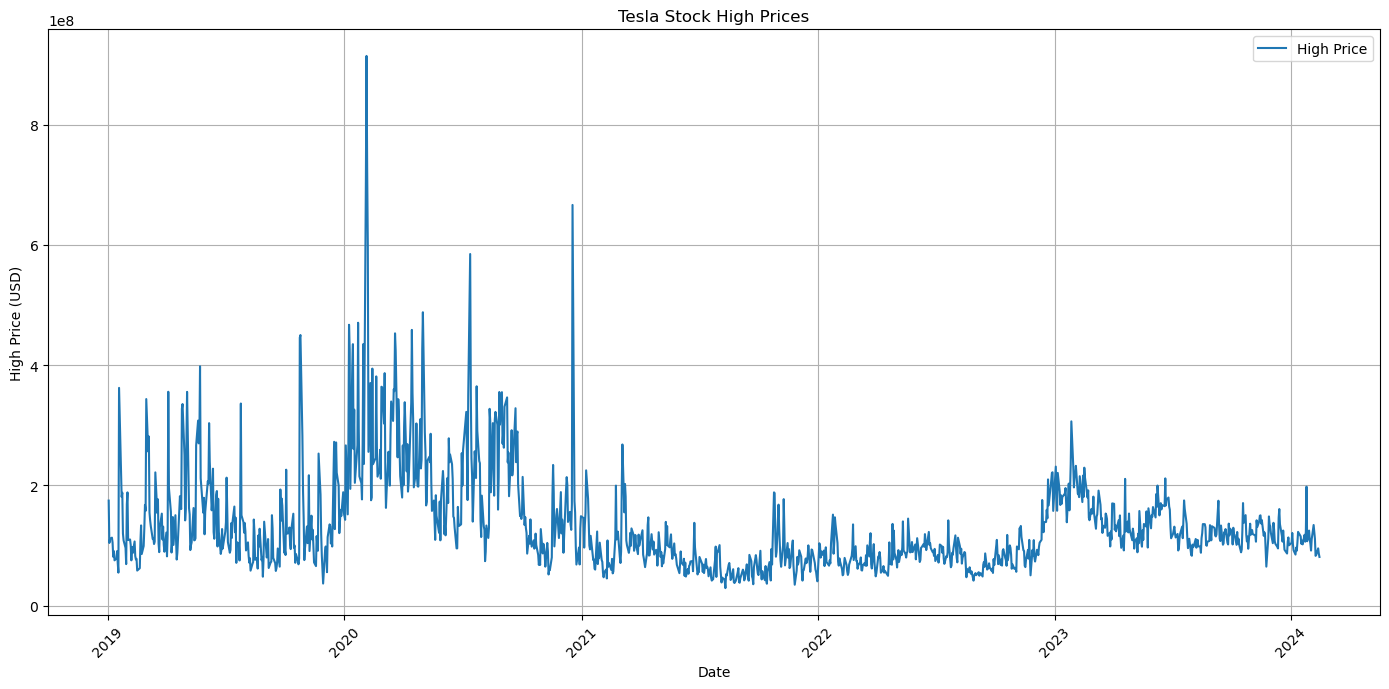

In [16]:
plt.figure(figsize=(14, 7))  # Set the figure size for better readability
plt.plot(tsla_df.index, tsla_df['Volume'], label='High Price')  # Plot the close price against the dates
plt.title('Tesla Stock High Prices')  # Title of the plot
plt.xlabel('Date')  # X-axis label
plt.ylabel('High Price (USD)')  # Y-axis label
plt.legend()  # Show legend to identify the line
plt.grid(True)  # Show grid for better readability of the plot
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to make sure everything fits without overlapping
plt.show()

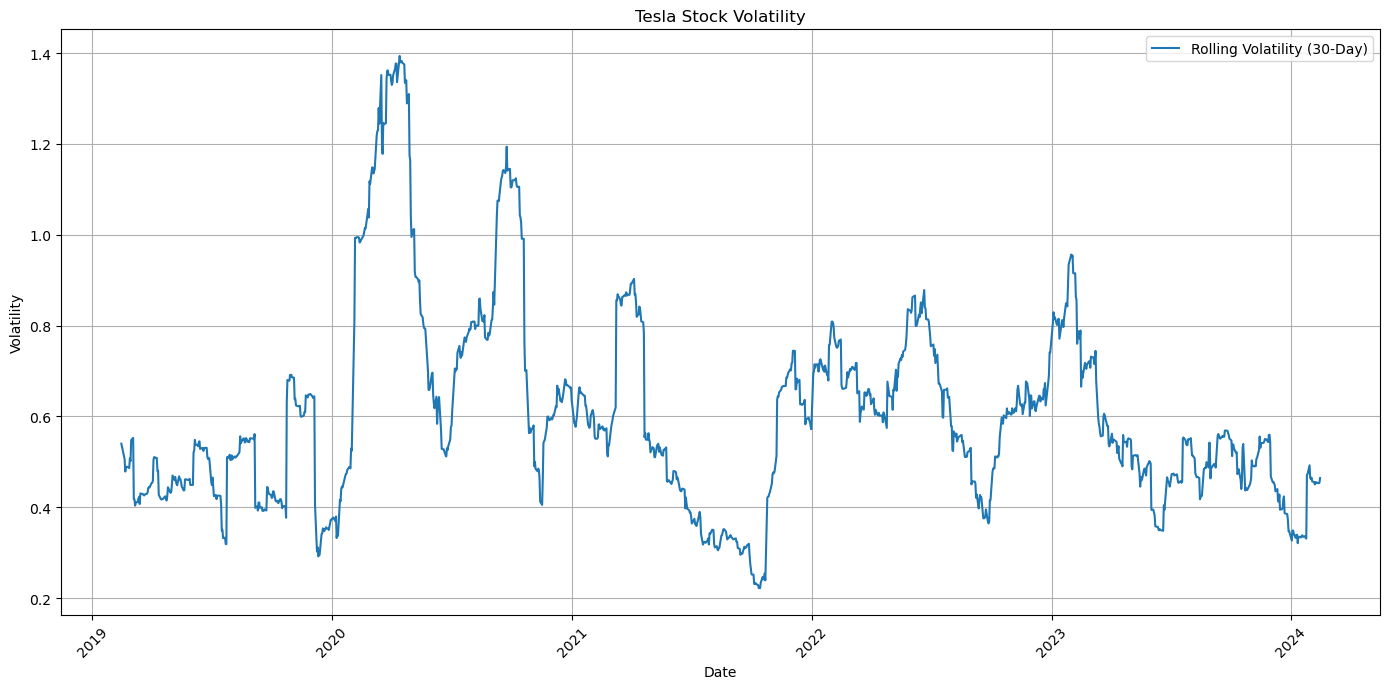

In [17]:
import matplotlib.pyplot as plt

# Calculate daily returns
tsla_df['Daily Returns'] = tsla_df['Close'].pct_change()

# Calculate the rolling standard deviation of daily returns (volatility)
# Using a 30-day window for this example
tsla_df['Volatility'] = tsla_df['Daily Returns'].rolling(window=30).std() * (252**0.5)  # Annualizing volatility

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(tsla_df.index, tsla_df['Volatility'], label='Rolling Volatility (30-Day)')
plt.title('Tesla Stock Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
